# TEST Fast5Tools package

## Imports

In [2]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
from itertools import islice
from pprint import pprint as pp
import pysam
import sys
from tqdm import tqdm
from collections import OrderedDict, defaultdict, Counter, namedtuple

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 1000

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Fast5Wrapper import Fast5Wrapper
from Fast5Tools.Helper_fun import stderr_print, recursive_file_gen
from Fast5Tools.Basecall import Basecall
from Fast5Tools.Alignment import Alignment
from Fast5Tools.Eventalign import Eventalign
from Fast5Tools.Fast5Parse import Fast5Parse

# Test Fast5

## Fast5 init

In [ ]:
help (Fast5.__init__, full=True)

In [12]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print (f)
print (f.raw)

[Fast5] file:./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5
	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459	Count Raw signals: 87570
	Zscore normalization	Raw mean before norm 707.9	Raw std before norm 123.45

[-0.68773109 -1.05224675 -0.95504257 ... -0.95504257 -0.94694222
  0.28431065]


In [13]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
print (f)
print (f.raw)

[Fast5] file:./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5
	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459	Count Raw signals: 87570

[623 578 590 ... 590 591 743]


In [6]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_237_strand.fast5")
print (f)

[Fast5] file:./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_237_strand.fast5
	Read ID: 2c32553e-62c6-4c7a-bf05-249771364f04	Count Raw signals: 56107
	Zscore normalization	Raw mean before norm 684.79	Raw std before norm 120.11
	Albacore_basecalling
		Seq: AUAUCGAAUA...CCUAAUCCAG / Length: 1147 / Empty kmers: 195 / Mean quality: 10.96



In [7]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", error_on_missing_basecall=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [8]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print(f.n_raw)
print(f.sequencing_kit)
print(f.flowcell_type)

87570
SQK-RNA001
FLO-MIN106


In [9]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'antons_mac_pro_internal_sanger_ac_uk_20180625_fah77625_mn23126_sequencing_run_s1_57529'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),


In [11]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
pd.DataFrame(f.analyses["Albacore_basecalling"].kmers).head()

,seq,start,end,mean,median,std
0,GGACT,0,15,578.866667,577.0,14.193269
1,ACTTC,15,60,NaN,NaN,NaN
2,ACTTC,15,60,570.333333,575.0,18.073922
3,CTTCC,60,105,541.688889,549.0,20.027561
4,TTCCC,105,120,498.933333,502.0,10.822610


## Test plot_raw

In [3]:
help (Fast5.plot_raw, full=True)

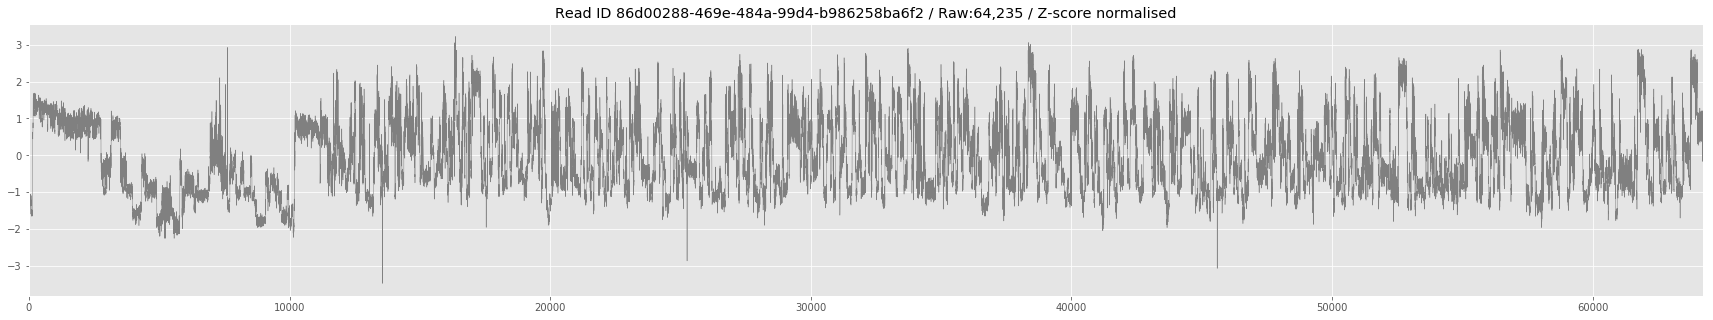

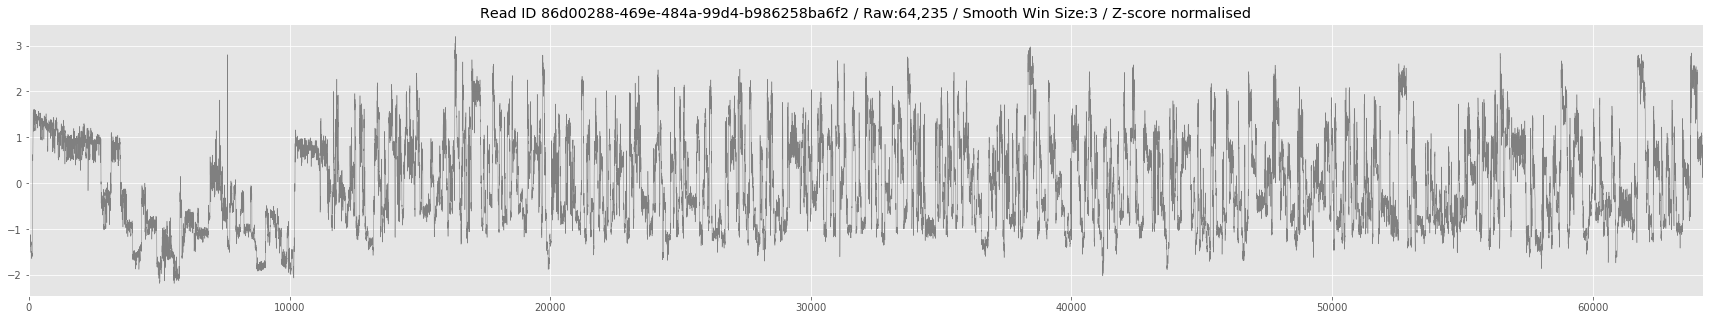

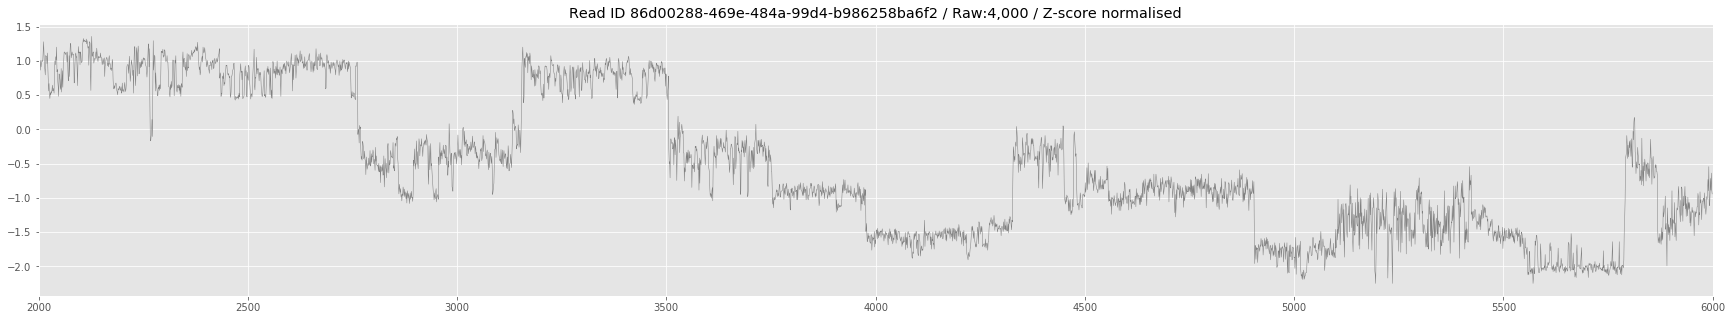

In [5]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_120_strand.fast5")
fig, ax = f.plot()
fig, ax = f.plot (smoothing_win_size=3)
fig, ax = f.plot (start = 2000, end = 6000)

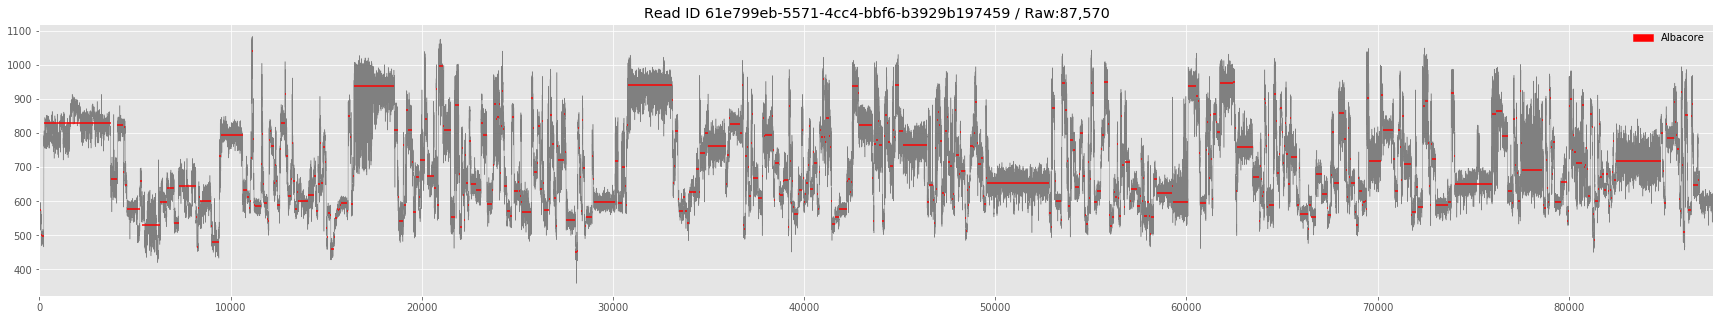

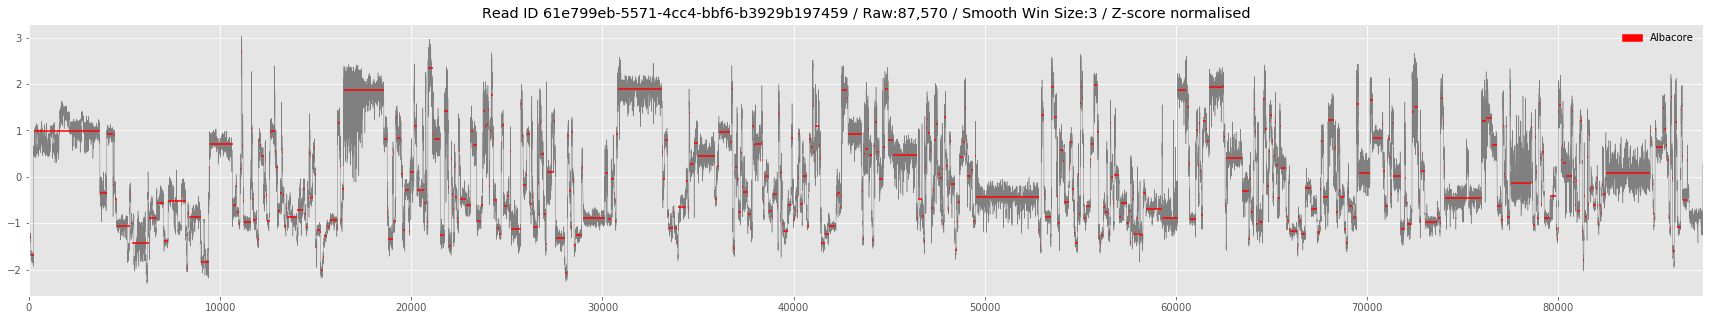

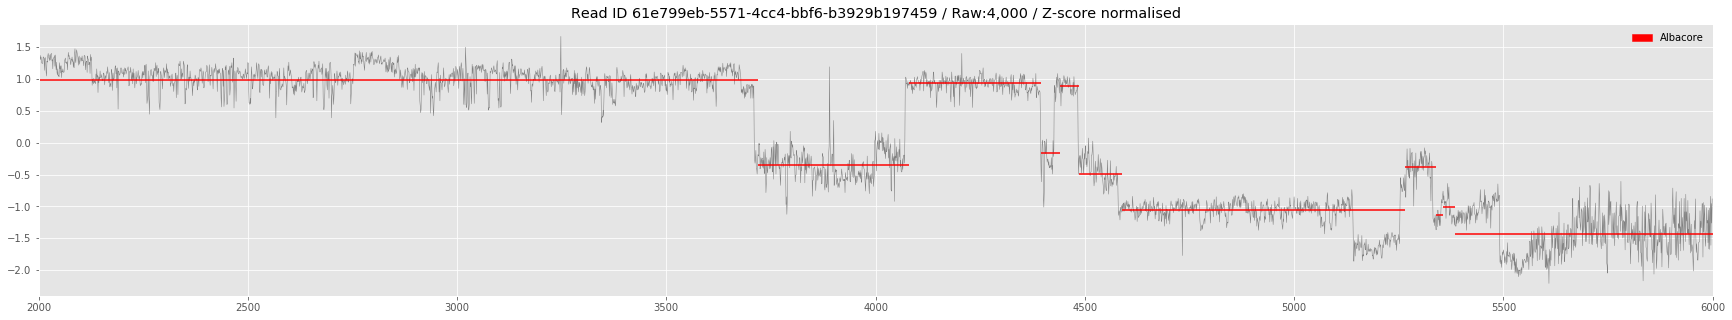

In [6]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
fig, ax = f.plot()

f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization="zscore")
fig, ax = f.plot (smoothing_win_size=3)
fig, ax = f.plot (start = 2000, end = 6000)

## Test get_raw

In [13]:
help(Fast5.get_raw, full=True)

* start INT

If defined the data will start at that value

* end INT

If defined the data will end at that value

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

In [5]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
%time display (f.get_raw ())
%time display (f.get_raw (smoothing_win_size=5))
%time display (f.get_raw (start=2000, smoothing_win_size=5))
%time display (f.get_raw (start=2000, end= 2005, smoothing_win_size=5))

array([-0.68773109, -1.05224675, -0.95504257, ..., -0.95504257,
       -0.94694222,  0.28431065])

CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.48 ms


array([-0.97934362, -1.01174501, -1.01174501, ..., -0.94694222,
       -0.33131579,  0.28431065])

CPU times: user 3.32 s, sys: 0 ns, total: 3.32 s
Wall time: 3.32 s


array([ 1.36975726,  1.30495447,  1.34545621, ..., -0.94694222,
       -0.33131579,  0.28431065])

CPU times: user 3.29 s, sys: 3.09 ms, total: 3.29 s
Wall time: 3.29 s


array([1.36975726, 1.30495447, 1.34545621, 1.30495447, 1.30495447])

CPU times: user 3.32 s, sys: 0 ns, total: 3.32 s
Wall time: 3.32 s


# Fast5_parse

In [3]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and save to database
Write database indexlid File:0
	Valid files:22 Invalid File:0
Load database index

[Fast5Wrapper] file:./data/Fast5Tools/read.db
	Number of sequences:22


In [21]:
f.sample(2)

[[Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_108_strand.fast5
 	Read ID: 0ef36fa0-7c3f-47f5-8410-027f50724701	Count Raw signals: 42730
 	Zscore normalization	Raw mean before norm 706.19	Raw std before norm 131.45
 	Albacore_basecalling
 		Seq: CACUUGAACG...CCUCAAUUUG / Length: 911 / Empty kmers: 142 / Mean quality: 12.19,
 [Fast5] file:./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_319_strand.fast5
 	Read ID: 9a1c5296-2ab1-4abd-8d50-e059754cf332	Count Raw signals: 47720
 	Zscore normalization	Raw mean before norm 693.64	Raw std before norm 119.91
 	Albacore_basecalling
 		Seq: GUACCAGCCA...CCAAUCCCAG / Length: 1231 / Empty kmers: 194 / Mean quality: 10.28]

In [22]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and save to database
Write database indexnvalid File:0
	Valid files:2,000 Invalid File:0


[Fast5Wrapper] file:/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db
	Number of sequences:2,000


In [24]:
f.sample (2)

[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_59_ch_172_strand.fast5
 	Read ID: 67d7efdd-bc2f-4f1b-893d-34c6ea9a43bf	Count Raw signals: 42243
 	Zscore normalization	Raw mean before norm 663.18	Raw std before norm 128.45
 	Albacore_basecalling
 		Seq: CAUUGGUGGU...AAAUCCCAGG / Length: 908 / Empty kmers: 140 / Mean quality: 11.58,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_113_ch_429_strand.fast5
 	Read ID: 9e86200e-f41d-42f5-aa13-77d5e44ffa1f	Count Raw signals: 25916
 	Zscore normalization	Raw mean before norm 718.28	Raw std before norm 127.22
 	Albacore_basecalling
 		Seq: CAUUUGUUAA...AUGAAGUUGC / Length: 606 / Empty kmers: 91 / Mean quality: 10.84]

In [32]:
f = Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db")
f

[Fast5Wrapper] file:/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db
	Number of sequences:2,000

# Alignment parsing

In [5]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", max_sync_buffer=5, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/genome_aligned_reads.bam", analysis_name="Genome_Alignment", max_sync_buffer=5, verbose=True)

Initialise
Parse Fast5 files and save to database
Write database index                                                                                
	Valid files:22 Invalid File:0
Load database index
	Read in database:22
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid reads:20	Reads not in database:0	Reads unmapped:2	Secondary hits:1
Parse alignment file ./data/align/genome_aligned_reads.bam
	Valid reads:22	Reads not in database:0	Reads unmapped:0	Secondary hits:1


In [6]:
f.sample()

[[Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_38_strand.fast5
 	Read ID:68804104-71dc-465c-b82d-3a99a4689701	Raw signals points:57697	Zscore normalised mean:674.7888278420022
 	Albacore_basecalling
 		Seq: UGGGCCUUCC...AUCCACCAGG / Length: 1006 / Empty kmers: 162 / Mean quality: 10.63
 	Transcriptome_Alignment
 		Query:68804104-71dc-465c-b82d-3a99a4689701-2:881 (1010 pb) / Reference:YIL117C-27:957(+) (930 pb) / Alignment len:879 / Mapq:60 / Align Score:1056
 	Genome_Alignment
 		Query:68804104-71dc-465c-b82d-3a99a4689701-47:1008 (1010 pb) / Reference:IX-140504:141542(-) (1038 pb) / Alignment len:961 / Mapq:60 / Align Score:1090,
 [Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_224_strand.fast5
 	Read ID:ed05c5e6-7aab-4970-a431-3411047764a6	Raw signals points:41612	Zscore normalised mean:699.4311736998943
 	Albacore_basecalling
 		Seq: GAAUUCAAGG...CUCCCUCCAG / Length

In [12]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read_small.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam", analysis_name="Genome_Alignment", verbose=True)

Initialise
Parse Fast5 files and save to database
Write database indexnvalid File:0
	Valid files:2,000 Invalid File:0
Load database indexParse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam
	Valid reads:1,879	Reads not in database:9,819	Reads unmapped:794	Secondary hits:2,222
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam
	Valid reads:1,982	Reads not in database:10,366	Reads unmapped:144	Secondary hits:1,544


# NanopolishParser

In [34]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True)
f.add_nanopolish_eventalign (eventalign_fn="./data/nanopolish/nanopolish_read_index_no_sec.tsv")

Initialise
Parse Fast5 files and save to database
Write database indexlid File:0
	Valid files:40 Invalid File:0
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid reads:20	Valid hits:21	Reads not in database:0	Skiped unmapped and secondary:2
Parse Nanopolish eventalign file ./data/nanopolish/nanopolish_read_index_no_sec.tsv
	Valid reads:19	Valid kmers:27,433	Empty_kmers:0	Reads not in database:0


,seq,start,end,mean,median,std
0,GTATC,1843,2038,-0.654044,-0.746684,0.398535
1,ATCCC,2038,2053,NaN,NaN,NaN
2,ATCCC,2038,2053,-1.364022,-1.370769,0.057216
3,TCCCT,2053,2083,-1.483216,-1.526790,0.127220
4,CCCTT,2083,2128,-1.285496,-1.294866,0.099902


ACAATTTTCAAAAATGCTTTTTGTCGCCTTTAACGCCGCTGTCGCCGCTGTCGCTTTGCCGCTGGTTAACAATTTTGCCAATTAAAATTTTCAGCCAACTTGGAAGGACGGCTTTTCCGAAAATGTTTTCCCCAGCTTGGTTTCCACCGCTACCCTTCCCCTGGCGAAGTTATCAATAAACCAACATTGGTGCCCTGTTCTTAAACCCCAAAGAACGGTACTTTTACTGCTGGTCCCGGTTTCCTTACTGGAGCTTAAAAACACCTCTGCCGGCTTTATTACTCTGGTTCCTCCTCTGGTGCTGCTGCTAAGGCTTTTTTCAATTCAACTTCTGGTGCCTTGTTTGCTGGTGGCGCCGCCTTTTGTTGTTTATTTTTGGTTTAATATTATTTTTTTACCCTAAATTTTTTTTTTTATAAACTTCTTGGCATTTAACAAATAAATAATTGGATTTAGGAAAAATTTTTAATTTTTAAATTATTCCCCTTCCCCTTTCTTAATCCCCCCCAACAAAAAAAATCCAAAACAAACTGGCCAACTACCCTTCCCCATG


,seq,start,end,ref_pos,mean,median,std
0,TGTTG,9815,9871,394,0.320767,-0.025613,0.770836
1,TTGTT,9871,9998,393,0.402076,0.493053,0.450162
2,GTTGT,9998,10026,392,-0.284343,-0.303921,0.178506
3,TGTTG,10026,10184,391,0.596818,0.526787,0.595275
4,TTGTT,10184,10208,390,0.823719,0.859913,0.174492


GCTCGCTTCTATCGCCGCTGTCGCCGCTGTCGCTTCTGCCGCTGCTAACGTTACCACTGCTACTGTCAGCCAAGACTACCACTTTGGTCACCATCACTTCTTGTGACCACGTCTGTTCAAACTCCCCAGCTTGGTTTCCACCGCTACCGTCACCGTCGATGACGTTATCACTCAATACACCACCTGGTGCCCATTGACCACTGAAGCCCAAAGAACGGTACTTCTACTGCTGCTCCAGTTACCTCTACTGAAGCTCCAAAGAACACCACCTCTGCTGCCAACTCACTCTCACCTCTTACACTGGTGCTGCTGCTAAGGCTTTGCCAGCTGCTGGTGCTTTGTTGGCTGGTGCCGCTGCTTTGTTGTGT


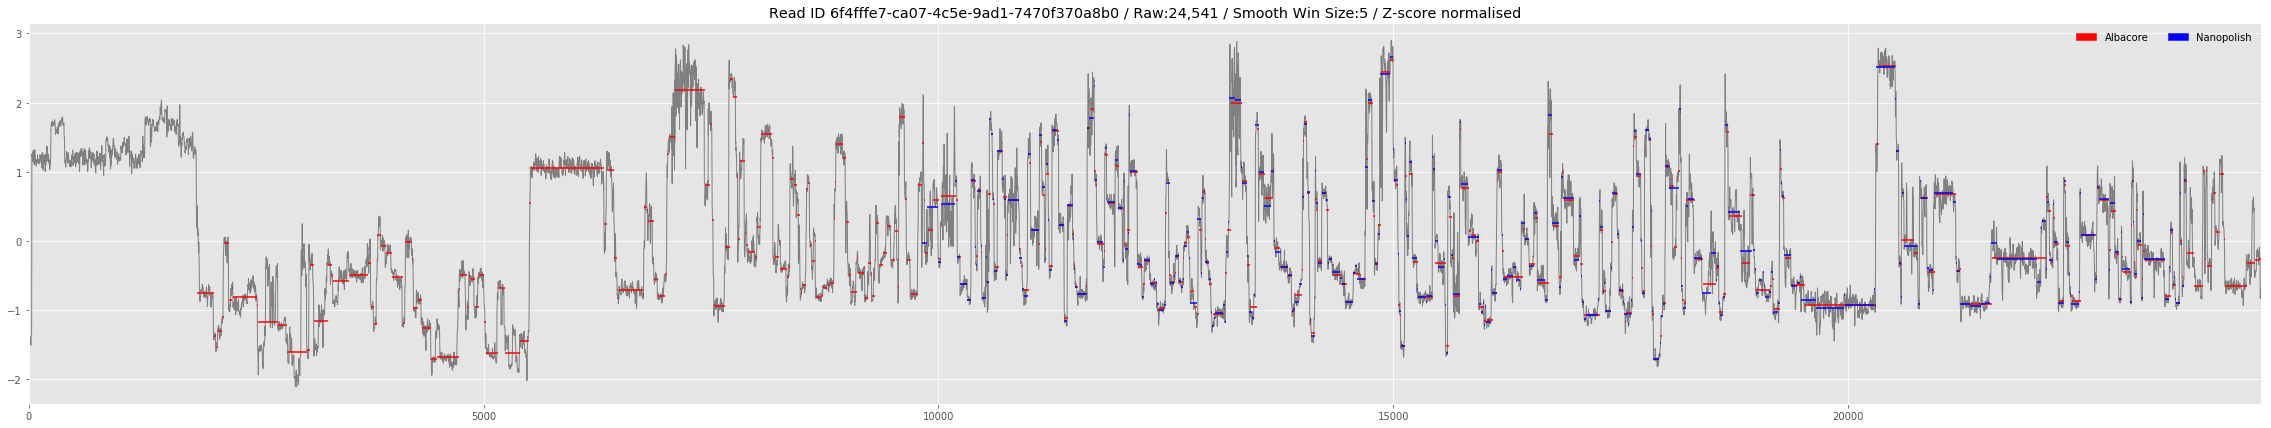

In [36]:
read_name = "6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0"
jprint ("Albacore", bold=True, size=110)
display (f[read_name].analyses['Albacore_basecalling'].kmers_df.head())
print (f[read_name].analyses['Albacore_basecalling'].kmer_seq)

jprint ("Nanopolish", bold=True, size=110)
display (f[read_name].analyses['Nanopolish_eventalign'].kmers_df.head())
print (f[read_name].analyses['Nanopolish_eventalign'].kmer_seq)

fig, ax = f[read_name].plot(figsize=(40,7), smoothing_win_size=5, raw_linewidth=1)

In [7]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam", analysis_name="Transcriptome_Alignment", include_secondary=False)
f.add_nanopolish_eventalign (eventalign_fn="/home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv")

Initialise
Parse Fast5 files and save to database
	Valid files:12,492 Invalid File:0
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam
	Valid reads:11,698	Valid hits:11,698	Reads not in database:0	Skiped unmapped and secondary:0
Parse Nanopolish eventalign file /home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv
	Valid reads:11,522	Valid kmers:14,075,941	Empty_kmers:43,038	Reads not in database:0


In [9]:
f.sample()

[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_416_ch_402_strand.fast5
 	Read ID: c503b1aa-91a7-422a-b152-4c9e249e5ba3
 	Count Raw signals: 52126
 	Albacore_basecalling
 		Seq: CAUAAAGUUU...CUAAAUCCAG / Length: 1292 / Empty kmers: 233 / Mean quality: 10.22
 	Transcriptome_Alignment
 		Query:c503b1aa-91a7-422a-b152-4c9e249e5ba3-2:1207 (1296 pb) / Reference:YHR174W-11:1288(+) (1277 pb) / Alignment len:1205 / Mapq:60 / Align Score:1290
 	Nanopolish_eventalign
 		Reference: YHR174W / Sequence: TGAGTTTACG...GCCGGTGAGT / Length: 1193 ,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/4/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_395_ch_435_strand.fast5
 	Read ID: 30633d3c-6b39-48e4-b24f-3ef36d5cdacc
 	Count Raw signals: 60382
 	Albacore_basecalling
 		Seq: UGUCUGCCAA...CUAAUCCCAG / Length: 1412 / Empty 

In [3]:
f = Fast5Wrapper(db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db")

In [4]:
d = defaultdict(list)
for read in f:
    if "Nanopolish_eventalign" in read.analyses:
        ref = read.analyses['Nanopolish_eventalign'].ref_name
        d[ref].append (read.read_id)

d

defaultdict(list,
            {'YLR110C': ['074cb613-a984-4296-bf50-5d3d37c129e0',
              'e3aadfc4-6e20-45f0-afeb-26dcff2a9f42',
              'f180638f-ac27-4da1-84e6-8c447498df35',
              '8b758c7f-04f1-4f16-ae55-406febf552b5',
              'f656f2d9-4bf3-4d9e-a2ae-b296e0221bf7',
              'a51dadce-6c22-4db8-aa6e-68a281b69175',
              'ae4579cd-000e-4a3e-aa70-735a18036234',
              'cec60a6a-7573-44d1-b8b6-a23992983032',
              '979de3d0-8d15-4f8f-9717-683e4670938a',
              '4d3386b5-1b3b-4b22-800e-864546e9c684',
              '3fa030d7-17ef-47aa-adb4-1db922a70fd8',
              'dc238aaa-8ddc-45a7-9e3d-ce63ea8a9793',
              '953df8df-477a-481e-9e50-3b37450ba434',
              '3cfaffcb-cbbc-4d09-9745-460fbb832301',
              '9ec514db-723b-473d-83d4-f77c028544d9',
              'c7fb1811-1287-4048-a7e7-a93516893fd0',
              '9c9185c7-7570-4c16-ac27-85c2ea63bc19',
              '36ebe8f6-2b3c-41c4-905d-3558bdec97cf',